**Vamos experimentar agora o algoritmo Decision Tree?**

In [106]:
!pip -q install yellowbrick


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.tree import DecisionTreeClassifier

In [108]:
with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\titanic.pkl', 'rb') as f:
    X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [109]:
print("Dimensões dos dados:")
print(f"X_treino: {X_treino.shape}")
print(f"X_teste: {X_teste.shape}")
print(f"y_treino: {y_treino.shape}")
print(f"y_teste: {y_teste.shape}")

Dimensões dos dados:
X_treino: (712, 21)
X_teste: (179, 21)
y_treino: (712,)
y_teste: (179,)


**Importando a biblioteca de ajuste de hiperparâmetros**

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
# Criando o modelo de árvore de decisão
# Você pode ajustar os hiperparâmetros conforme necessário
# modelo = DecisionTreeClassifier(
#     criterion='entropy',  # Pode ser 'gini' ou 'entropy'
#     max_depth=3,          # Profundidade máxima da árvore
#     min_samples_split=15, # Número mínimo de amostras para dividir um nó
#     min_samples_leaf=2,   # Número mínimo de amostras em uma folha
#     random_state=42       # Para reprodutibilidade
# )

param_grid = {
    'criterion':  ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'max_depth':  [None, 3, 5, 7, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
}

modelo = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=10,
    n_jobs=5,
    verbose=1,
)



**Agora precisamos rodar a árvore com os hiperparâmetros obtidos**

In [112]:
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

Fitting 10 folds for each of 630 candidates, totalling 6300 fits
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.8, 'min_samples_leaf': 6, 'min_samples_split': 5}
0.8314749608763694


In [113]:
modelo = DecisionTreeClassifier(
    criterion='entropy',       # Pode ser 'gini' ou 'entropy'
    max_depth=3,            # Profundidade máxima da árvore
    max_features= 0.8,    
    min_samples_leaf=6,     # Número mínimo de amostras em uma folha  
    min_samples_split=2,   # Número mínimo de amostras para dividir um nó
    random_state=42         # Para reprodutibilidade
)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=0.8,
                       min_samples_leaf=6, random_state=42)



> **Vamos testar o modelo?**



In [114]:
# Fazendo previsões
y_pred_treino = modelo.predict(X_treino)
y_pred_teste = modelo.predict(X_teste)



> **Será se o modelo acertou?**



In [115]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Avaliando o modelo
print("\nAcurácia no conjunto de treino:", accuracy_score(y_treino, y_pred_treino))
print("Acurácia no conjunto de teste:", accuracy_score(y_teste, y_pred_teste))


Acurácia no conjunto de treino: 0.827247191011236
Acurácia no conjunto de teste: 0.8044692737430168


In [116]:
# Matriz de confusão
print("\nMatriz de confusão (conjunto de teste):")
conf_matrix = confusion_matrix(y_teste, y_pred_teste)
print(conf_matrix)


Matriz de confusão (conjunto de teste):
[[88 17]
 [18 56]]


c:\Users\João\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8044692737430168

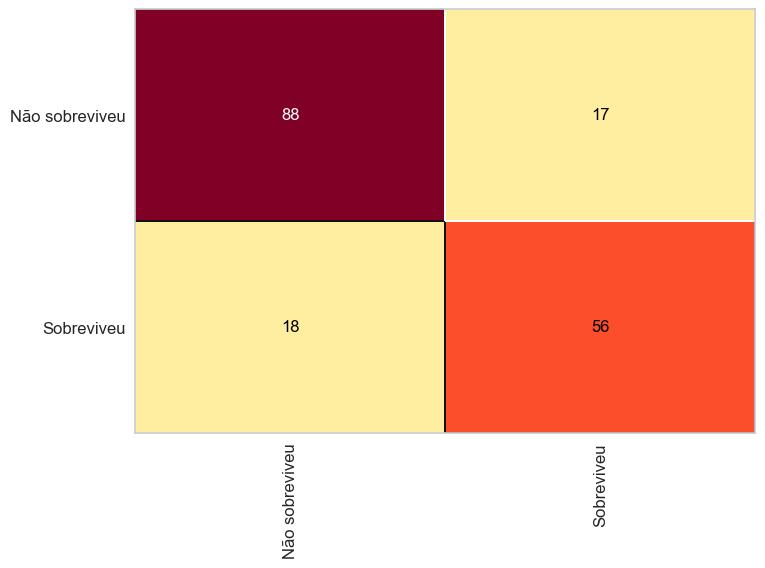

In [117]:
from yellowbrick.classifier import ConfusionMatrix

# Definir os rótulos das classes
classes = ['Não sobreviveu', 'Sobreviveu']

# Criar o visualizador com os rótulos personalizados
cm = ConfusionMatrix(
    modelo, 
    classes=classes
)

# Ajustar o modelo e desenhar a matriz
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)


In [118]:
print(classification_report(y_teste, y_pred_teste))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



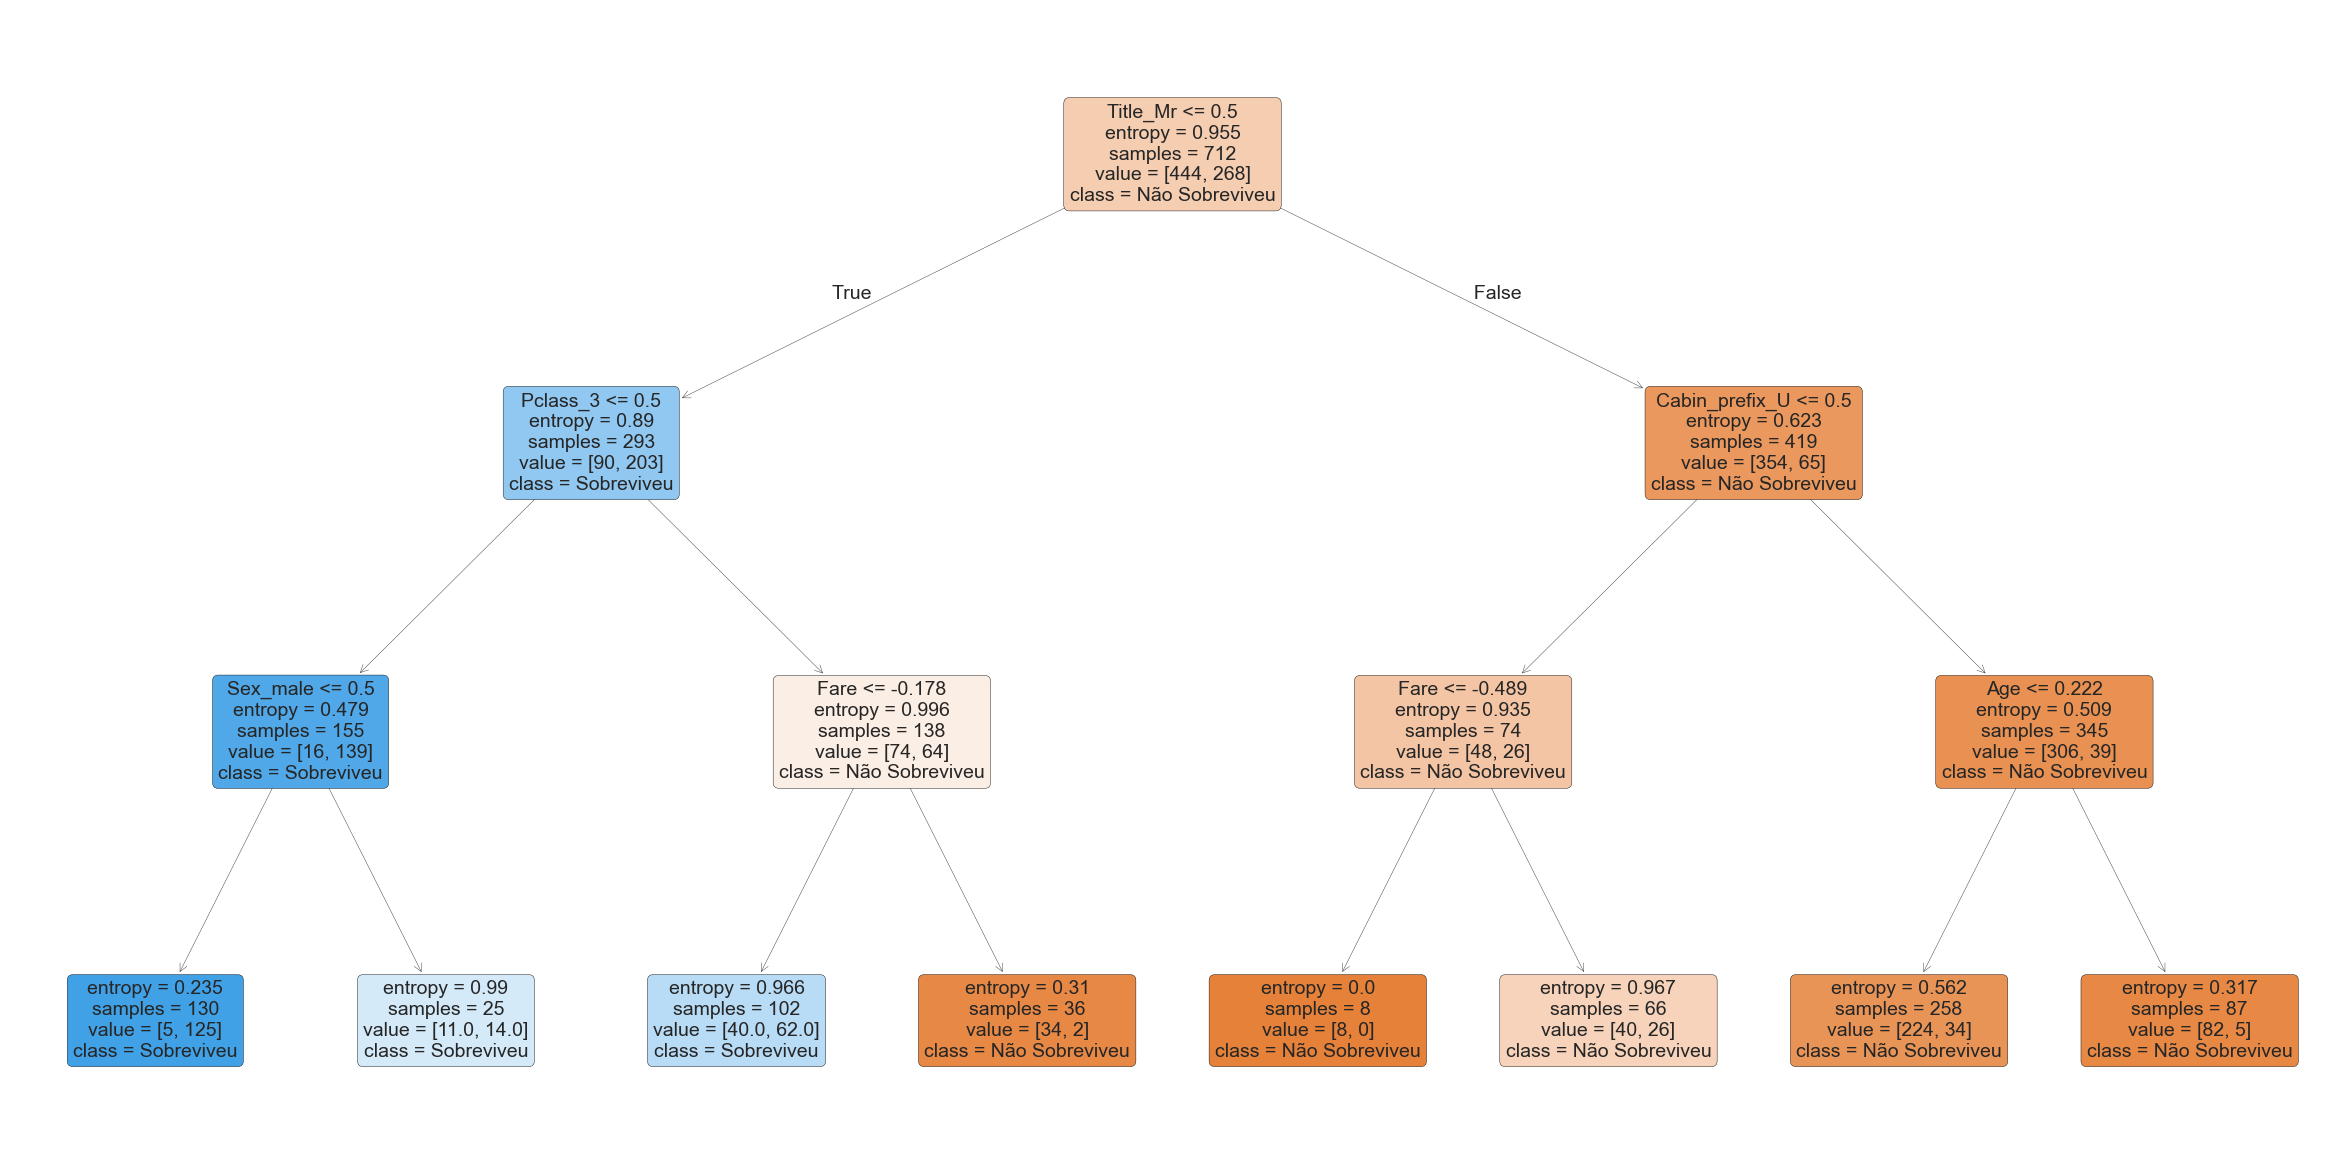

In [119]:
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

# Método 1: Visualização básica com matplotlib (mais legível)
plt.figure(figsize=(30, 15))  
tree.plot_tree(
    modelo, 
    feature_names=X_treino.columns,
    class_names= ['Não Sobreviveu', 'Sobreviveu'],
    filled=True, 
    rounded=True,
    fontsize=14  # Aumentei o tamanho da fonte
)
plt.savefig(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\arvore_decisao_titanic.png', 
            dpi=300, 
            bbox_inches='tight',
            pad_inches=0.5)
plt.show()

In [120]:
# Para uma visualização mais compacta (opcional)
from sklearn.tree import export_text
texto_arvore = export_text(modelo, feature_names=list(X_treino.columns))
print("\nRepresentação textual da árvore:")
print(texto_arvore)



Representação textual da árvore:
|--- Title_Mr <= 0.50
|   |--- Pclass_3 <= 0.50
|   |   |--- Sex_male <= 0.50
|   |   |   |--- class: 1
|   |   |--- Sex_male >  0.50
|   |   |   |--- class: 1
|   |--- Pclass_3 >  0.50
|   |   |--- Fare <= -0.18
|   |   |   |--- class: 1
|   |   |--- Fare >  -0.18
|   |   |   |--- class: 0
|--- Title_Mr >  0.50
|   |--- Cabin_prefix_U <= 0.50
|   |   |--- Fare <= -0.49
|   |   |   |--- class: 0
|   |   |--- Fare >  -0.49
|   |   |   |--- class: 0
|   |--- Cabin_prefix_U >  0.50
|   |   |--- Age <= 0.22
|   |   |   |--- class: 0
|   |   |--- Age >  0.22
|   |   |   |--- class: 0



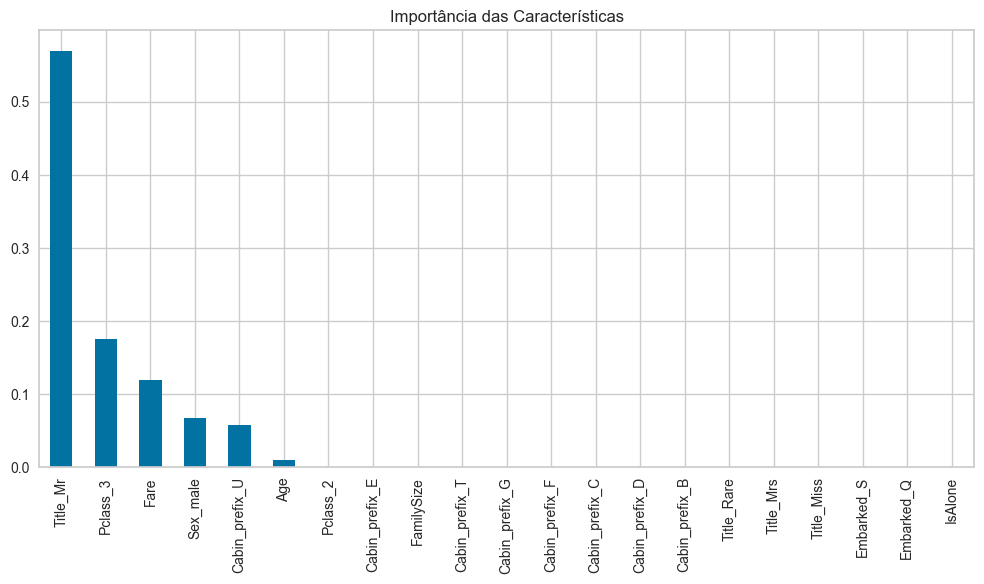


Modelo salvo com sucesso!


In [121]:
importancias = pd.Series(modelo.feature_importances_, index=X_treino.columns)
importancias = importancias.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importancias.plot(kind='bar')
plt.title('Importância das Características')
plt.tight_layout()
plt.savefig(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\importancia_caracteristicas.png')
plt.show()

# Salvando o modelo treinado
with open(r'C:\Users\João\Documents\source\4o-periodo\inteligencia-artificial\Lista 2\output\modelo_arvore_titanic.pkl', 'wb') as f:
    pickle.dump(modelo, f)

print("\nModelo salvo com sucesso!")